In [1]:
import pandas as pd
import numpy as np
import pickle

import math
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
# font_path = '/data/wangyuhang/ttf/ARIAL.TTF'

from collections import Counter
from itertools import chain
from scipy.optimize import curve_fit
import powerlaw

from rapidfuzz import process, fuzz
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('/data/huggingface/hub/sentence-transformers_all-MiniLM-L6-v2')
import oracledb
connection = oracledb.connect(user="", password="", host="",port=,service_name="")

import oracledb
from sqlalchemy import create_engine
import cx_Oracle
from tqdm import tqdm

from matplotlib.font_manager import FontProperties

from sentence_transformers.util import cos_sim
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from powerlaw import Fit, plot_pdf

from tqdm import tqdm
import re
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve,precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from aquarel import load_theme
import matplotlib.pyplot as plt
import numpy as np
theme = load_theme("arctic_light") #调用aquarel中的'arctic_dark',"arctic_light"
#调用aquarel
# theme.apply()

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# 下载NLTK的punkt数据
nltk.download('punkt')
stemmer = PorterStemmer()
def get_dict(x,dictionary):
    return [dictionary[str(item)] for item in x]
def get_larger(x,number):
    return [item for item in x if item>number]
def compare_larger(x,number):
    return any([item>number for item in x])
def convert_date(x):
    try:
        date=pd.Timestamp(x)
    except:
        date=pd.Timestamp(x.split('-')[0]+'-01-01')
    return date
def Word_overlap_score(x, y):
    # Add a check to ensure x and y are strings
    if not isinstance(x, str) or not isinstance(y, str):
        return 0  # or any other value that makes sense in your context

    token_x = [stemmer.stem(token) for token in word_tokenize(x)]
    token_y = [stemmer.stem(token) for token in word_tokenize(y)]
    return len([i for i in token_x if i in token_y])
with open('model/model_5','rb') as f:
    Logistic_model=pickle.load(f)

[nltk_data] Error loading punkt: <urlopen error [Errno 111] Connection
[nltk_data]     refused>


In [2]:
# df_ppp=pd.read_pickle('version_3/df_ppp.pickle')
# df_paper=pd.read_pickle('version_3/df_paper.pickle')
# df_patent=pd.read_pickle('version_3/df_patent.pickle')


In [3]:
# df_paper_eid_abs = pd.read_sql(sql='SELECT t.* FROM "df_paper_eid_abs" t', con=connection)
# df_paper_eid_abs=df_paper_eid_abs.drop_duplicates('eid')
# df_paper_eid_abs

In [4]:
# df_patent_appln_id_abs = pd.read_sql(sql='SELECT t.* FROM "df_patent_appln_id_abs" t', con=connection)
# df_patent_appln_id_abs=df_patent_appln_id_abs.drop_duplicates('appln_id')
# df_patent_appln_id_abs['appln_id']=df_patent_appln_id_abs['appln_id'].astype(str)
# df_patent_appln_id_abs

In [5]:
# df_paper_eid_abs['description_embedding']=list(model.encode(df_paper_eid_abs['description'].astype(str).tolist(),show_progress_bar=True,convert_to_numpy=True))
# df_patent_appln_id_abs['appln_abstract_embedding']=list(model.encode(df_patent_appln_id_abs['appln_abstract'].astype(str).tolist(),show_progress_bar=True,convert_to_numpy=True))

In [6]:
# df_patent_appln_id_abs.to_pickle('version_3/df_patent_appln_id_abs.pickle')
# df_paper_eid_abs.to_pickle('version_3/df_paper_eid_abs.pickle')

In [7]:
# df_patent_appln_id_abs=pd.read_pickle('version_3/df_patent_appln_id_abs.pickle')
# df_paper_eid_abs=pd.read_pickle('version_3/df_paper_eid_abs.pickle')

In [8]:
# df_ppp=df_ppp.merge(df_paper_eid_abs,left_on='eid',right_on='eid',how='inner')
# df_ppp=df_ppp.merge(df_patent_appln_id_abs,left_on='appln_id',right_on='appln_id',how='inner')

In [9]:
# df_ppp.to_pickle('version_3/df_ppp2.pickle')

In [10]:
# # 假设 original_df 是你的原始 DataFrame
# # 按行拆分的大小（每个小DataFrame的行数）
# chunk_size = 1000

# # 获取原始DataFrame的行数
# total_rows = len(df_ppp)

# # 计算要拆分的小DataFrame的数量
# num_chunks = (total_rows // chunk_size) + 1

# # 拆分DataFrame为小DataFrame列表
# small_dfs = [df_ppp.iloc[i * chunk_size:(i + 1) * chunk_size] for i in range(num_chunks)]

# final_dfs=[]
# # small_dfs 现在包含了原始DataFrame拆分后的多个小DataFrame
# pd.options.mode.chained_assignment = None  # 禁用警告
# threshold=0.5213402455879239
# for df_item in tqdm(small_dfs):
#     temp=[cos_sim(x,y)[0][0] for x,y in zip(df_item['title_patent_embedding'],df_item['title_paper_embedding'])]
#     df_item['simility']=temp

#     temp_abs=[cos_sim(x,y)[0][0] for x,y in zip(df_item['appln_abstract_embedding'],df_item['description_embedding'])]
#     df_item['simility_abstract']=temp_abs 
    
#     df_item['Word_overlap_score'] = df_item.apply(lambda row: Word_overlap_score(row['title_patent'], row['title_paper']), axis=1)
#     df_item['Word_overlap_score_abs'] = df_item.apply(lambda row: Word_overlap_score(row['description'], row['appln_abstract']), axis=1)

#     X = df_item[['Word_overlap_score', 'simility','simility_abstract']]
#     y_pred = (Logistic_model.predict_proba(X)[:, 1] > threshold).astype(int)
#     df_item['y_pred']=y_pred 
#     df_item=df_item[df_item['y_pred']==1]
#     final_dfs.append(df_item)

In [86]:
df_paper=pd.read_pickle('version_4/df_paper.pickle')
df_patent=pd.read_pickle('version_4/df_patent.pickle')
df_ppp=pd.read_pickle('version_4/df_ppp_pred.pickle')


In [87]:
df_ppp=df_ppp.merge(df_patent[['appln_id','appln_filing_date','appln_filing_year','appln_auth']].drop_duplicates('appln_id'),left_on='appln_id',right_on='appln_id',how='left')
df_ppp=df_ppp.merge(df_paper[['eid','coverDate']].drop_duplicates('eid'),left_on='eid',right_on='eid',how='left')


In [88]:
# df_ppp=pd.concat([pd.read_pickle('df_ppp_part/'+i) for i in os.listdir('df_ppp_part')])
# df_ppp

In [89]:
df_patent['PPP']=np.where(df_patent['appln_id'].isin(df_ppp['appln_id']),1,0)
df_paper['PPP']=np.where(df_paper['eid'].isin(df_ppp['eid']),1,0)


In [90]:
print('author_id number--',len(df_ppp['author_id'].unique()))
print('person_id number--',len(df_ppp['person_id'].unique()))
print('appln_id number--',len(df_ppp['appln_id'].unique()))
print('total appln_id number--',len(df_patent['appln_id'].unique()))
print('eid number--',len(df_ppp['eid'].unique()))
print('total eid number--',len(df_paper['eid'].unique()))
print('paper-patent pair number--',len(df_ppp.drop_duplicates(['appln_id','eid'])))


author_id number-- 105722
person_id number-- 119264
appln_id number-- 333835
total appln_id number-- 476901
eid number-- 2405006
total eid number-- 3270371
paper-patent pair number-- 15169430


In [91]:
df_patent['appln_filing_year'].sort_values()

597481    1969.0
669712    1970.0
669560    1970.0
260415    1971.0
427532    1972.0
           ...  
677455    2022.0
212072    2022.0
634264    2022.0
163172    2022.0
663709    2022.0
Name: appln_filing_year, Length: 737747, dtype: float64

In [92]:
df_paper['coverDate_year'].sort_values()

3723725    1980
3986963    1980
1873256    1980
1873242    1980
2468642    1980
           ... 
3394001    2022
3394013    2022
3394014    2022
1229302    2022
1131566    2022
Name: coverDate_year, Length: 4798120, dtype: int64

In [93]:
# df_match_result_with_address=pd.read_pickle('data/version/version_v1/df_all.pickle')
# df_match_result_with_address

In [94]:
# t0=df_match_result_with_address.drop_duplicates('author_id')
# t0

In [95]:
df_patent.columns

Index(['person_id', 'appln_id', 'title', 'labels', 'appln_auth', 'appln_nr',
       'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'ipr_type', 'receiving_office',
       'internat_appln_id', 'int_phase', 'reg_phase', 'nat_phase',
       'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors', 'citedby_count',
       'cited_appln_id', 'citation_count_5year', 'PPP'],
      dtype='object')

In [96]:
df_ppp['PPP_item']=range(len(df_ppp))

In [97]:
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']))
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']['eid'].unique()))
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']['appln_id'].unique()))

Doudna, Jennifer A.: 1531
Doudna, Jennifer A.: 236
Doudna, Jennifer A.: 9


In [98]:
print('Zhang Feng:',len(df_ppp[df_ppp['author_id']=='58377871700']))
print('Zhang Feng:',len(df_ppp[df_ppp['author_id']=='58377871700']['eid'].unique()))
print('Zhang Feng:',len(df_ppp[df_ppp['author_id']=='58377871700']['appln_id'].unique()))

Zhang Feng: 810
Zhang Feng: 11
Zhang Feng: 75


In [99]:
# df_match_result_with_address[df_match_result_with_address['author_id']=='55613230891']

In [100]:
df_ppp[(df_ppp['title_paper'].str.contains('CRISPR',na=False))&(df_ppp['author_id']=='55613230891')]

,author_id,person_id,eid,title_paper,doi,source_id,appln_id,title_patent,simility,simility_abstract,Word_overlap_score,Word_overlap_score_abs,y_pred,appln_filing_date,appln_filing_year,appln_auth,coverDate,PPP_item


In [101]:
df_count_paper=df_ppp.groupby(['author_id']).agg(paper_conut=('eid','count')).reset_index()
df_count_patent=df_ppp.groupby(['author_id']).agg(patent_conut=('appln_id','count')).reset_index()


In [102]:
df_count=df_ppp.groupby(['author_id']).agg(
                                            paper_conut=('eid',lambda x:len(set(list(x)))),
                                            patent_conut=('appln_id',lambda x:len(set(list(x)))),
                                            PPP_conut=('PPP_item','count')
                                          ).reset_index()
df_count

,author_id,paper_conut,patent_conut,PPP_conut
0,10038841100,40,2,80
1,10038945100,5,1,5
2,10039078400,14,1,14
3,10039332100,21,1,21
4,10039611300,11,1,11
...,...,...,...,...
105717,9942746700,37,1,37
105718,9942895600,31,1,31
105719,9942918600,79,52,2490
105720,9943303700,11,2,18


In [103]:
len(df_ppp[df_ppp['author_id']=='36121797300']['eid'].unique())

194

In [104]:
len(df_ppp[df_ppp['author_id']=='36121797300']['appln_id'].unique())

848

In [105]:
df_count_10=df_count.sort_values('PPP_conut',ascending=False).head(10)

df_count_10=df_count_10.merge(df_paper[['author_id','author_name','affiliation_country','affilname']],
                              how='left',left_on='author_id',right_on='author_id')
# df_count_10=df_count_10[['author_id','scopus_matching_name','affiliation_country','affilname','PPP_conut']]
# df_count_10=df_count_10.merge(df_count_patent,left_on='author_id',right_on='author_id')
# df_count_10=df_count_10.merge(df_count_paper,left_on='author_id',right_on='author_id')
df_count_10=df_count_10.drop_duplicates('author_id')
df_count_10['affiliation_country']=df_count_10['affiliation_country'].apply(lambda x:x.split(';')[0])
df_count_10['affilname']=df_count_10['affilname'].apply(lambda x:x.split(';')[0])
df_count_10

,author_id,paper_conut,patent_conut,PPP_conut,author_name,affiliation_country,affilname
0,36121797300,194,848,122995,"Xie, Y.",China,School of Life Sciences Fudan University
194,36066507700,579,444,90167,"Chen, Jian",China,Nankai University
773,55905660400,515,151,66138,"DeLuca, H.",United States,Washington University School of Medicine in St...
1295,36013862000,1135,138,53799,"Nakamura, Yusuke",Japan,Graduate School of Medicine
2439,36040059800,2874,35,38924,"Raoult, Didier",France,Université Paris Cité
5452,57203179721,555,109,35838,"Wilson, J. M.",United States,University of Pennsylvania
6029,56381767900,503,553,33073,"Li, Ping",United States,"University of California, Los Angeles"
6533,7202975031,728,70,32506,"Croce, Carlo M.",Israel,Weizmann Institute of Science Israel
7283,35418504700,750,54,31429,"Sette, A.",United States,University of Virginia School of Medicine
8047,57211879445,543,828,28855,"Li, Jun",China,Anhui Medical University


In [106]:
df_count_10[['author_name','affiliation_country','affilname','paper_conut','patent_conut','PPP_conut']].to_csv('version_4_result/df_count_10.csv',encoding='utf-8-sig')

# 时序分析

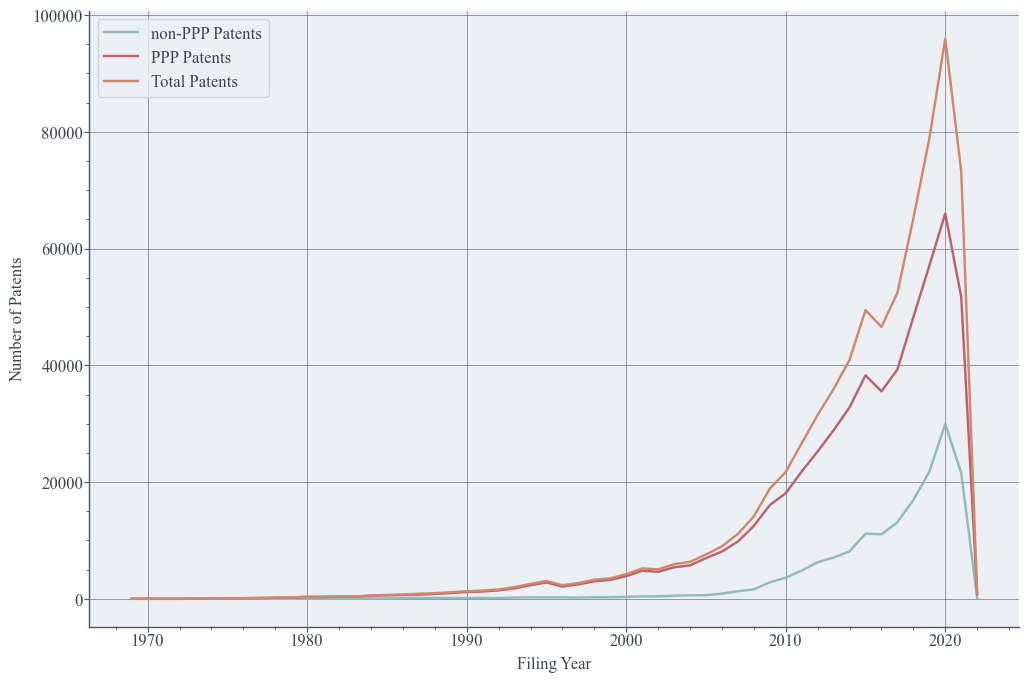

In [107]:
#调用aquarel
theme.apply()
# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
# font_path = '/data/wangyuhang/ttf/ARIAL.TTF'

font = FontProperties(fname=font_path, size=12)
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_filing_year', 'PPP']).size().unstack(fill_value=0)
# grouped_data = grouped_data[grouped_data.index.isin(range(1980,2021))]
# 计算每年总专利数量和核心专利数量
total_patents_per_year = grouped_data.sum(axis=1)
core_patents_per_year = grouped_data[1]  # 假设 1 表示核心专利

# 绘制折线图和柱状图合一的图
plt.figure(figsize=(12, 8))

# 柱状图
plt.plot(grouped_data.index, grouped_data[0], marker='', label='non-PPP Patents')
plt.plot(grouped_data.index, grouped_data[1], marker='', label='PPP Patents')
plt.plot(grouped_data.index, grouped_data.sum(axis=1), marker='', label='Total Patents')

# 设置图表标题和标签
# plt.title('Total Patents Over Years')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

# 显示图例
plt.legend(prop=font)

plt.savefig('version_4_result/patent_over_year.png', format='png', bbox_inches='tight')
plt.savefig('version_4_result/patent_over_yea.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

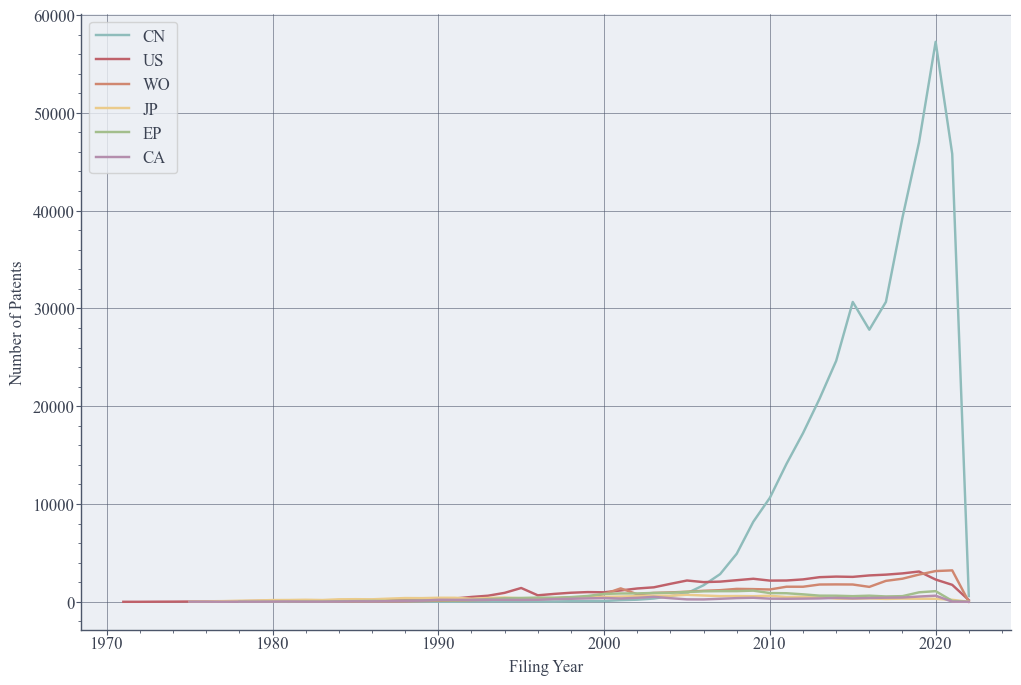

In [108]:
#调用aquarel
theme.apply()
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_auth', 'appln_filing_year', 'PPP']).size().unstack(fill_value=0).reset_index()
# grouped_data = grouped_data[grouped_data['appln_filing_year'].isin(range(1980,2021))]

# 计算每年各国总专利数量
total_patents_per_year = grouped_data.groupby(['appln_auth','appln_filing_year']).sum()

# 绘制折线图
plt.figure(figsize=(12, 8))

# 遍历每个国家，绘制折线图
for country in ['CN','US','WO','JP','EP', 'CA']:
    country_data = grouped_data[grouped_data['appln_auth'] == country]
    plt.plot(country_data['appln_filing_year'], country_data[1], marker='', label=country)

# 设置图表标题和标签
# plt.title('PPP Patents Over Years by Country')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

# 显示图例
plt.legend(prop=font)
plt.savefig('version_4_result/PPP Patents Over Years by Country.png', format='png', bbox_inches='tight')
plt.savefig('version_4_result/PPP Patents Over Years by Country.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

/tmp/ipykernel_30363/3878225434.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)
/tmp/ipykernel_30363/3878225434.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)
/tmp/ipykernel_30363/3878225434.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], co

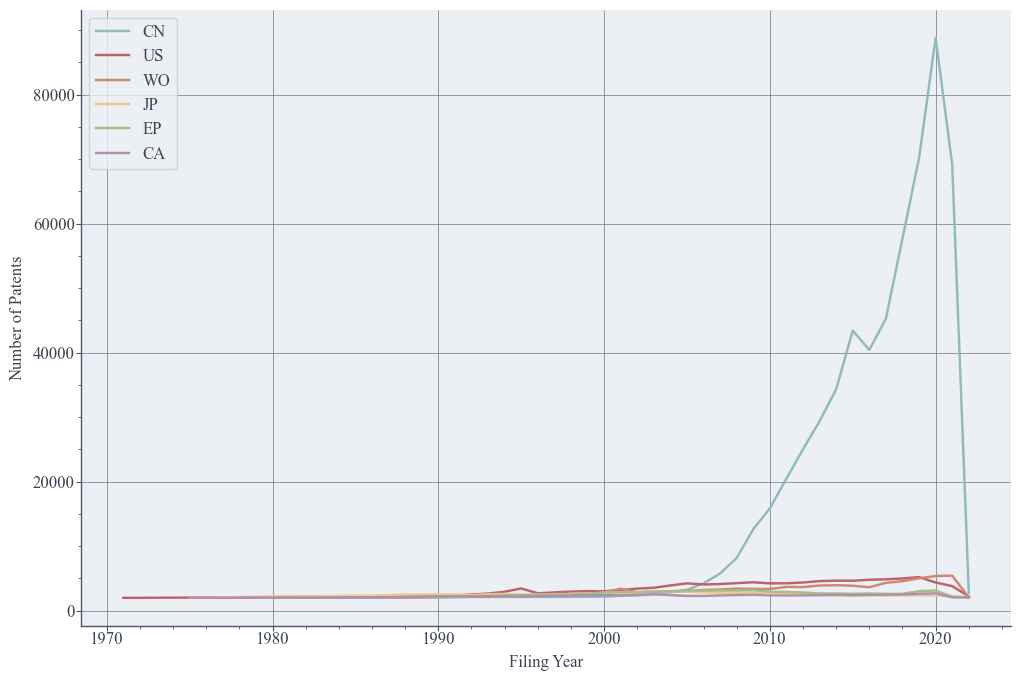

In [109]:
#调用aquarel
theme.apply()
# 按年份和 'PPP' 列进行分组，并计算每组的数量
# 遍历每个国家，绘制折线图
plt.figure(figsize=(12, 8))

for country in ['CN','US','WO','JP','EP', 'CA']:
    country_data = grouped_data[grouped_data['appln_auth'] == country]
    plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)

# 设置图表标题和标签
# plt.title('Total Patents Over Years by Country')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

# 显示图例
plt.legend(prop=font)
plt.savefig('version_4_result/Total Patents Over Years by Country.png', format='png', bbox_inches='tight')
plt.savefig('version_4_result/Total Patents Over Years by Country.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

In [110]:
df_patent['citation_count_5year']=df_patent['citation_count_5year'].fillna(0)

df_patent

,person_id,appln_id,title,labels,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_original,...,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors,citedby_count,cited_appln_id,citation_count_5year,PPP
0,9384898,52568004,Apparatus for high-frequency hyperthermia,651,US,66035184,A,1984-10-12 00:00:00,1984.0,660351,...,16506615.0,34334329.0,2.0,8.0,2.0,2.0,NaN,52568004,3.0,1
1,9384900,52568004,Apparatus for high-frequency hyperthermia,651,US,66035184,A,1984-10-12 00:00:00,1984.0,660351,...,16506615.0,34334329.0,2.0,8.0,2.0,2.0,NaN,52568004,3.0,1
2,5762813,46482242,Apparatus for inducing whole body hyperthermia...,651,US,5388393,A,1993-04-27 00:00:00,1993.0,053883,...,21987202.0,1290643.0,10.0,40.0,1.0,2.0,NaN,46482242,2.0,1
3,5762812,46482242,Apparatus for inducing whole body hyperthermia...,651,US,5388393,A,1993-04-27 00:00:00,1993.0,053883,...,21987202.0,1290643.0,10.0,40.0,1.0,2.0,NaN,46482242,2.0,1
4,37692963,47242438,METHOD AND APPARATUS FOR HYPERTHERMIA TREATMENT,651,WO,9404593,W,1994-04-26 00:00:00,1994.0,US9404593,...,21987202.0,1290643.0,10.0,40.0,1.0,2.0,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737742,62535779,520316723,METHODS FOR DETERMINING QUALITY OF EMBRYO,3376,JP,2019095944,A,2019-05-22 00:00:00,2019.0,2019095944,...,48698981.0,419101526.0,12.0,9.0,4.0,4.0,NaN,NaN,0.0,1
737743,62535779,567010260,METHODS FOR DETERMINING QUALITY OF EMBRYO,3376,JP,2021169295,A,2021-10-15 00:00:00,2021.0,2021169295,...,48698981.0,419101526.0,12.0,9.0,4.0,4.0,NaN,NaN,0.0,1
737744,55334074,564766225,PREDICTING EMBRYO IMPLANTATION PROBABILITY,3376,WO,2021056255,W,2021-07-12 00:00:00,2021.0,IB2021/056255,...,79172761.0,563645794.0,2.0,0.0,1.0,4.0,NaN,NaN,0.0,1
737745,50190939,564766225,PREDICTING EMBRYO IMPLANTATION PROBABILITY,3376,WO,2021056255,W,2021-07-12 00:00:00,2021.0,IB2021/056255,...,79172761.0,563645794.0,2.0,0.0,1.0,4.0,NaN,NaN,0.0,1


# time lag

In [111]:
len(df_ppp)

16539084

In [112]:
len(df_ppp)

16539084

In [113]:
df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']
df_ppp['time_lag']=df_ppp['time_lag'].apply(lambda x:x.days/365)

/tmp/ipykernel_30363/2594595657.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']


In [114]:
df_time_lag=df_ppp.sort_values(['eid','time_lag'])[['author_id', 'person_id','eid','appln_id','coverDate','appln_filing_date','time_lag']]
df_time_lag=df_time_lag.drop_duplicates(['appln_id', 'person_id'],keep='first')
df_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
10120488,35466054000,30985100,2-s2.0-0000000863,39097280,1991-01-01,2005-11-30 00:00:00,-14.923288
51137,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
12463968,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
965718,7006102710,37002324,2-s2.0-0000001398,45686315,1998-01-01,2003-01-03 00:00:00,-5.008219
965720,7006102710,37002324,2-s2.0-0000001398,47398978,1998-01-01,1998-08-13 00:00:00,-0.613699
...,...,...,...,...,...,...,...
12933568,55718278300,66016963,2-s2.0-9244243603,536134250,2004-12-01,2019-10-28 00:00:00,-14.915068
92482,36559753100,5757939,2-s2.0-9444267155,47252369,2004-12-24,1994-11-18 00:00:00,10.106849
13454548,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342
10261766,8950561800,60668619,2-s2.0-9644281624,502136710,2005-01-01,2017-12-08 00:00:00,-12.942466


In [115]:
# 先有专利，后有的论文，所以time_lag是正的，选择绝对值最小的，因此是first
df_patent_time_lag=df_time_lag[df_time_lag['time_lag']>0].drop_duplicates(['person_id','appln_id'],keep='first')
df_patent_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
965112,7006102710,5285887,2-s2.0-0000001398,54106902,1998-01-01,1997-08-13 00:00:00,0.386301
965111,7006102710,5285887,2-s2.0-0000001398,53559340,1998-01-01,1997-02-26 00:00:00,0.846575
965110,7006102710,5285887,2-s2.0-0000001398,50537007,1998-01-01,1995-02-23 00:00:00,2.857534
13816520,56091532400,19778854,2-s2.0-0000004392,26120397,1987-01-01,1983-02-14 00:00:00,3.882192
13816521,56091532400,19778854,2-s2.0-0000004392,34105658,1987-01-01,1981-12-07 00:00:00,5.071233
...,...,...,...,...,...,...,...
1254681,7404449972,30565713,2-s2.0-9044251600,26904043,1996-01-01,1992-02-24 00:00:00,3.854795
3339019,35411113600,19850480,2-s2.0-9144242925,38186215,2004-01-01,2003-07-14 00:00:00,0.468493
10330198,7102103132,19630091,2-s2.0-9144245598,38222522,2004-01-01,2003-09-05 00:00:00,0.323288
10330199,7102103132,19630091,2-s2.0-9144245598,38222534,2004-01-01,2003-09-05 00:00:00,0.323288


In [116]:
# df_plot=df_patent_time_lag.groupby(
#     [pd.Grouper(key='appln_filing_date', freq='Y',label='left')]).agg(    
#     time_lag_mean=('time_lag','mean')).reset_index()
# plt.figure(figsize=(12, 8)

# # Create your plot using Seaborn
# sns.lineplot(data=df_plot, x='appln_filing_date', y='time_lag_mean')

# # Save the figure
# plt.savefig('image/Time_lag.png', format='png', bbox_inches='tight')

# # Show the plot
# plt.show()

In [117]:
# 先有论文，后有的专利，所以time_lag是负的，选择绝对值最小的，因此是last
df_paper_time_lag=df_time_lag[df_time_lag['time_lag']<0].drop_duplicates(['person_id','eid'],keep='last')
df_paper_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
10120488,35466054000,30985100,2-s2.0-0000000863,39097280,1991-01-01,2005-11-30 00:00:00,-14.923288
51137,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
12463968,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
965719,7006102710,37002324,2-s2.0-0000001398,47384058,1998-01-01,1998-02-26 00:00:00,-0.153425
4222612,36051435500,81755340,2-s2.0-0000002132,528230165,1991-07-01,2020-01-15 00:00:00,-28.561644
...,...,...,...,...,...,...,...
1770904,7003613740,30811534,2-s2.0-9144253978,439492632,2004-01-16,2013-07-23 00:00:00,-9.523288
12933568,55718278300,66016963,2-s2.0-9244243603,536134250,2004-12-01,2019-10-28 00:00:00,-14.915068
13454548,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342
10261766,8950561800,60668619,2-s2.0-9644281624,502136710,2005-01-01,2017-12-08 00:00:00,-12.942466


In [118]:
df_paper_time_lag=df_paper_time_lag.merge(df_ppp[['appln_id','appln_auth']],how='left',left_on='appln_id',right_on='appln_id')

In [119]:
five_big=['WO','EP','JP','KOR','CN','US']

In [120]:
df_paper_time_lag.loc[~df_paper_time_lag['appln_auth'].isin(five_big),'appln_auth']='Other'

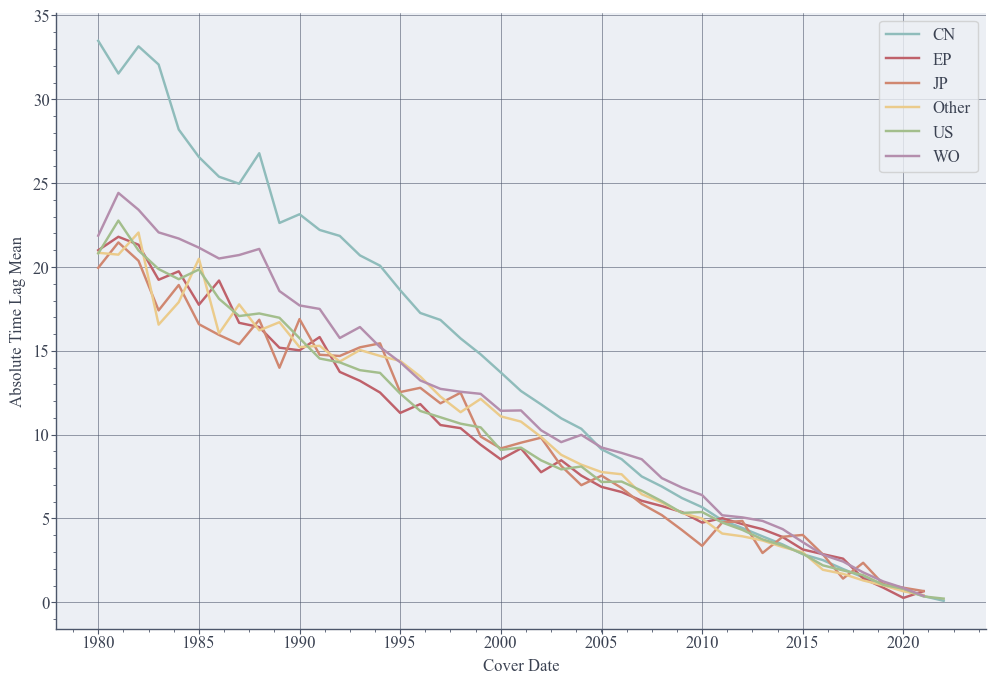

In [121]:
#调用aquarel
theme.apply()
# Grouping and aggregating data
df_plot = df_paper_time_lag.groupby([
    pd.Grouper(key='coverDate', freq='Y', label='left'),
    'appln_auth'
]).agg(time_lag_mean=('time_lag', 'mean')).reset_index()

# Plotting with plt and sns
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_plot, x='coverDate', y=np.abs(df_plot['time_lag_mean']), hue='appln_auth')

# Set plot labels and title
plt.xlabel('Cover Date', fontproperties=font)
plt.ylabel('Absolute Time Lag Mean', fontproperties=font)
# plt.title('Per Nation Time Lag', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

plt.legend(prop=font)

# Save the figure
plt.savefig('version_4_result/per_nation_time_lag.png', format='png', bbox_inches='tight')
plt.savefig('version_4_result/per_nation_time_lag.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [122]:
# Your existing code
theme.apply()
df_plot=df_paper_time_lag.groupby(
    [pd.Grouper(key='coverDate', freq='Y',label='left'),'appln_auth']).agg(    
    time_lag_mean=('time_lag','mean')).reset_index()
df_plot

# Create the lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_plot, x='coverDate', y=np.abs(df_plot['time_lag_mean']), hue='appln_auth')

# Set font properties
plt.xlabel('coverDate', fontproperties=font)
plt.ylabel('time_lag_mean', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

plt.legend(prop=font)
plt.savefig('version_4_result/per nation time lag.png', format='png', bbox_inches='tight')
plt.savefig('version_4_result/per_nation_time_lag.jpg', format='jpg', dpi=300, bbox_inches='tight')


# 卡方检验

In [123]:
df_paper.columns

Index(['author_id', 'author_name', 'eid', 'title', 'doi', 'source_id',
       'labels', 'coverDate', 'afid', 'affilname', 'affiliation_city',
       'affiliation_country', 'author_count', 'author_names', 'author_ids',
       'author_afids', 'openaccess', 'freetoread', 'freetoreadLabel',
       'fund_acr', 'fund_no', 'fund_sponsor', 'citedby_count',
       'coverDate_year', 'PPP'],
      dtype='object')

In [40]:
df_patent_K=df_patent[df_patent['appln_filing_year']<=2017]
df_paper_K=df_paper[df_paper['coverDate_year']<=2017]


In [41]:
print('科学转换的专利五年内平均被引',df_patent_K[(df_patent_K['PPP']==1)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].mean())
print('非科学转换的专利五年内平均被引',df_patent_K[(df_patent_K['PPP']==0)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].mean())

print('科学转换的论文平均被引',df_paper_K[(df_paper_K['PPP']==1)&(df_paper_K['eid'].notnull())]['citedby_count'].mean())
print('非科学转换的论文平均被引',df_paper_K[(df_paper_K['PPP']==0)&(df_paper_K['eid'].notnull())]['citedby_count'].mean())

科学转换的专利五年内平均被引 2.794324211013286
非科学转换的专利五年内平均被引 1.4715896670995616
科学转换的论文平均被引 66.80554024276047
非科学转换的论文平均被引 45.63859445150477


In [42]:
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_patent_K[(df_patent_K['PPP']==1)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].to_numpy(), 
                              df_patent_K[(df_patent_K['PPP']==0)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

Wilcoxon rank-sum statistic: 53.3781512603824
P-value: 0.0


In [43]:
# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_paper_K[(df_paper['PPP']==1)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy(), 
                              df_paper_K[(df_paper['PPP']==0)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

/tmp/ipykernel_30363/925221174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  statistic, p_value = ranksums(df_paper_K[(df_paper['PPP']==1)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy(),
/tmp/ipykernel_30363/925221174.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_paper_K[(df_paper['PPP']==0)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy())


Wilcoxon rank-sum statistic: 226.5284050971198
P-value: 0.0


In [44]:
df_patent_K.columns

Index(['person_id', 'appln_id', 'title', 'labels', 'appln_auth', 'appln_nr',
       'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'ipr_type', 'receiving_office',
       'internat_appln_id', 'int_phase', 'reg_phase', 'nat_phase',
       'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors', 'citedby_count',
       'cited_appln_id', 'citation_count_5year', 'PPP'],
      dtype='object')

In [45]:
from linearmodels.panel import PanelOLS#
mod = PanelOLS.from_formula("citation_count_5year ~ PPP+docdb_family_size+labels+nb_citing_docdb_fam+nb_applicants+nb_inventors+EntityEffects",
                            data=df_patent_K.set_index(['person_id',"appln_filing_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,0.3647,0.0269,13.571,0.0000,0.3121,0.4174
docdb_family_size,-0.0719,0.0171,-4.2132,0.0000,-0.1054,-0.0385
labels,7.345e-05,8.222e-06,8.9332,0.0000,5.734e-05,8.957e-05
nb_citing_docdb_fam,0.0916,0.0106,8.6117,0.0000,0.0708,0.1125
nb_applicants,0.5003,0.0351,14.269,0.0000,0.4316,0.5690
nb_inventors,0.0221,0.0054,4.0687,0.0000,0.0114,0.0327


In [47]:
df_paper_K['author_count']=df_paper_K['author_count'].astype(float)
df_paper_K['openaccess']=df_paper_K['openaccess'].astype(float)
# df_paper['afid']=df_paper['afid'].astype(int).astype(str)
# df_paper_K


/tmp/ipykernel_30363/908603321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_K['author_count']=df_paper_K['author_count'].astype(float)
/tmp/ipykernel_30363/908603321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_K['openaccess']=df_paper_K['openaccess'].astype(float)


In [48]:
from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula("citedby_count ~ PPP+author_count+labels+openaccess+EntityEffects",
                            data=df_paper_K.set_index(['author_id',"coverDate_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,16.540,0.3401,48.629,0.0000,15.874,17.207
author_count,3.2515,0.0665,48.912,0.0000,3.1212,3.3818
labels,0.0030,9.385e-05,31.728,0.0000,0.0028,0.0032
openaccess,5.1487,0.2964,17.368,0.0000,4.5677,5.7297


In [49]:
print('a')

a
